In [1]:
import sys
import os, os.path

sys.path.append(os.path.join(os.getcwd() ,'/modules'))
root_path = "C:/git/Springboard-Public/Capstone Project 2/"
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    root_path = "/content/drive/My Drive/Capstone Project 2/"

print('Current Working Dir: ', os.getcwd())
print('Root Path: ', root_path)

# We need to set the working directory since we are using relative paths from various locations
if os.getcwd() != root_path:
  os.chdir(root_path)

Current Working Dir:  C:\git\Springboard-Public\Capstone Project 2\notebooks
Root Path:  C:/git/Springboard-Public/Capstone Project 2/


In [2]:
from modules.lib.StandardTraining import *
from modules.models.ResNet import ResNet_GrayScale_12_Out

from torchsummary import summary

# os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

%matplotlib inline

In [3]:
force_cpu = True
device = torch.device('cuda' if ~force_cpu and torch.cuda.is_available() else 'cpu')
# Assume that we are on a CUDA machine, then this should print a CUDA device:
print(f'Working on device={device}')

Working on device=cuda


In [4]:
net = ResNet_GrayScale_12_Out(layers=34, drop_out_precent=.2) #18, 34, 50, 101, 152

net = nn.DataParallel(net)
net.to(device)


summary(net, (1, 320, 320))   

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 160, 160]           3,136
       BatchNorm2d-2         [-1, 64, 160, 160]             128
              ReLU-3         [-1, 64, 160, 160]               0
         MaxPool2d-4           [-1, 64, 80, 80]               0
            Conv2d-5           [-1, 64, 80, 80]          36,864
       BatchNorm2d-6           [-1, 64, 80, 80]             128
              ReLU-7           [-1, 64, 80, 80]               0
            Conv2d-8           [-1, 64, 80, 80]          36,864
       BatchNorm2d-9           [-1, 64, 80, 80]             128
             ReLU-10           [-1, 64, 80, 80]               0
       BasicBlock-11           [-1, 64, 80, 80]               0
           Conv2d-12           [-1, 64, 80, 80]          36,864
      BatchNorm2d-13           [-1, 64, 80, 80]             128
             ReLU-14           [-1, 64,

          ResNet-125                 [-1, 1000]               0
          Linear-126                   [-1, 12]          12,012
ResNet_GrayScale_12_Out-127                   [-1, 12]               0
Total params: 21,803,412
Trainable params: 21,803,412
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.39
Forward/backward pass size (MB): 196.50
Params size (MB): 83.17
Estimated Total Size (MB): 280.07
----------------------------------------------------------------


In [5]:
standardTraining = StandardTraining(number_images=25000, 
                                     batch_size=32, 
                                     learning_rate=1e-4, 
                                     num_epochs=5,
                                     device=device, 
                                     net=net,
                                     use_positivity_weights=True,
                                     observation_min_count = 150,
                                     l2_reg=1e-6)

Total Oversampled Rows Added to Train: 24,869

Number of Training Images: 44,824
Number of Validation Images: 5,045

Positive Weights used in BCEWithLogitsLoss:


Enlarged_Cardiomediastinum     6.249555
Cardiomegaly                   4.101172
Lung_Opacity                   1.111451
Lung_Lesion                    7.069127
Edema                          2.867806
Consolidation                  5.239421
Pneumonia                     10.425950
Atelectasis                    3.111916
Pneumothorax                   5.657359
Pleural_Effusion               1.489946
Pleural_Other                 18.354059
Fracture                       8.202217
dtype: float64

In [6]:
standardTraining.train()

▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [1/5]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 925.9706         
Time of Completion: 2020-07-27 08:37:42.846730          
Training Time: 0:09:31.236282          
Validation Time: 0:00:29.691675

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,8787,0.766701,0.486777,0.595483,0.878801,0.735629
4,Edema,11589,0.785831,0.526021,0.630199,0.859247,0.709424
5,Consolidation,7184,0.766843,0.484137,0.593546,0.891749,0.771174
7,Atelectasis,10901,0.695257,0.479927,0.567864,0.820456,0.698433
9,Pleural_Effusion,18002,0.731030,0.658659,0.692960,0.823942,0.774872



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,542,0.193727,0.316265,0.240275,0.736703,0.264573
4,Edema,1232,0.130682,0.612167,0.215385,0.739460,0.468304
5,Consolidation,339,0.002950,0.166667,0.005797,0.577614,0.092868
7,Atelectasis,782,0.401535,0.189614,0.257588,0.571174,0.191103
9,Pleural_Effusion,1728,0.760995,0.510085,0.610776,0.755977,0.591490


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [2/5]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 661.6737         
Time of Completion: 2020-07-27 08:48:30.938421          
Training Time: 0:10:15.285391          
Validation Time: 0:00:32.447285

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,8787,0.844884,0.648838,0.733996,0.944489,0.867055
4,Edema,11589,0.839503,0.623734,0.715710,0.920394,0.830651
5,Consolidation,7184,0.831431,0.639576,0.722992,0.945669,0.874453
7,Atelectasis,10901,0.761857,0.611291,0.678319,0.899260,0.822189
9,Pleural_Effusion,18002,0.819520,0.772045,0.795074,0.916109,0.892228



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,542,0.416974,0.310867,0.356186,0.769020,0.321019
4,Edema,1232,0.860390,0.371278,0.518718,0.764132,0.475159
5,Consolidation,339,0.008850,0.075000,0.015831,0.643112,0.097016
7,Atelectasis,782,0.345269,0.193548,0.248048,0.581466,0.186652
9,Pleural_Effusion,1728,0.395833,0.651429,0.492441,0.764220,0.612974


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [3/5]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 581.6054         
Time of Completion: 2020-07-27 09:00:19.271429          
Training Time: 0:11:13.961865          
Validation Time: 0:00:34.006119

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,8787,0.866280,0.689430,0.767803,0.958683,0.896478
4,Edema,11589,0.856933,0.654475,0.742144,0.934841,0.859987
5,Consolidation,7184,0.853563,0.679446,0.756617,0.957420,0.897773
7,Atelectasis,10901,0.782772,0.641917,0.705381,0.915552,0.844659
9,Pleural_Effusion,18002,0.843240,0.795472,0.818660,0.932103,0.913338



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,542,0.381919,0.337684,0.358442,0.759180,0.317978
4,Edema,1232,0.379058,0.493658,0.428834,0.743570,0.451573
5,Consolidation,339,0.265487,0.103926,0.149378,0.618850,0.105639
7,Atelectasis,782,0.219949,0.224837,0.222366,0.584504,0.195699
9,Pleural_Effusion,1728,0.689815,0.552876,0.613800,0.768236,0.621770


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [4/5]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 519.8530         
Time of Completion: 2020-07-27 09:11:51.819593          
Training Time: 0:11:02.304989          
Validation Time: 0:00:29.866183

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,8787,0.886423,0.715375,0.791766,0.967571,0.916641
4,Edema,11589,0.861507,0.669034,0.753168,0.942670,0.876675
5,Consolidation,7184,0.871381,0.712092,0.783725,0.966763,0.915955
7,Atelectasis,10901,0.795065,0.670405,0.727433,0.926623,0.864685
9,Pleural_Effusion,18002,0.856349,0.814971,0.835148,0.943030,0.927192



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,542,0.151292,0.453039,0.226833,0.767800,0.310358
4,Edema,1232,0.716721,0.429057,0.536778,0.769037,0.486496
5,Consolidation,339,0.035398,0.113208,0.053933,0.629860,0.092744
7,Atelectasis,782,0.113811,0.213942,0.148581,0.588650,0.194951
9,Pleural_Effusion,1728,0.476852,0.652415,0.550986,0.776984,0.627844


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [5/5]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 471.8569         
Time of Completion: 2020-07-27 09:20:53.248157          
Training Time: 0:08:31.646157          
Validation Time: 0:00:29.439324

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,8787,0.895641,0.740009,0.810421,0.972361,0.927543
4,Edema,11589,0.876952,0.688924,0.771649,0.951211,0.892724
5,Consolidation,7184,0.885301,0.739105,0.805624,0.973117,0.929692
7,Atelectasis,10901,0.814421,0.686196,0.744830,0.937148,0.879085
9,Pleural_Effusion,18002,0.863737,0.820484,0.841555,0.949441,0.934907



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,542,0.274908,0.380102,0.319058,0.777226,0.323624
4,Edema,1232,0.570617,0.469606,0.515207,0.770222,0.488631
5,Consolidation,339,0.053097,0.090452,0.066914,0.620748,0.091085
7,Atelectasis,782,0.074169,0.263636,0.115768,0.589676,0.199364
9,Pleural_Effusion,1728,0.803241,0.522001,0.632779,0.781886,0.630500



TRAINING

▔▔▔▔▔


,Score for all Targets
Accuracy Score,0.504127
Hamming Loss,0.090058
Combined Recall,0.752135
Combined Precision,0.676550
Combined F1,0.693820


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
0,Enlarged_Cardiomediastinum,6183,0.892932,0.713953,0.793475,0.975045,0.927658
1,Cardiomegaly,8787,0.895641,0.740009,0.810421,0.972361,0.927543
2,Lung_Opacity,21229,0.815959,0.791863,0.803731,0.909611,0.907764
3,Lung_Lesion,5555,0.910711,0.722198,0.805573,0.981483,0.939777
4,Edema,11589,0.876952,0.688924,0.771649,0.951211,0.892724
5,Consolidation,7184,0.885301,0.739105,0.805624,0.973117,0.929692
6,Pneumonia,3923,0.916900,0.652813,0.762642,0.985138,0.934377
7,Atelectasis,10901,0.814421,0.686196,0.744830,0.937148,0.879085
8,Pneumothorax,6733,0.889054,0.684036,0.773185,0.972344,0.915717
9,Pleural_Effusion,18002,0.863737,0.820484,0.841555,0.949441,0.934907


***** ROC *****


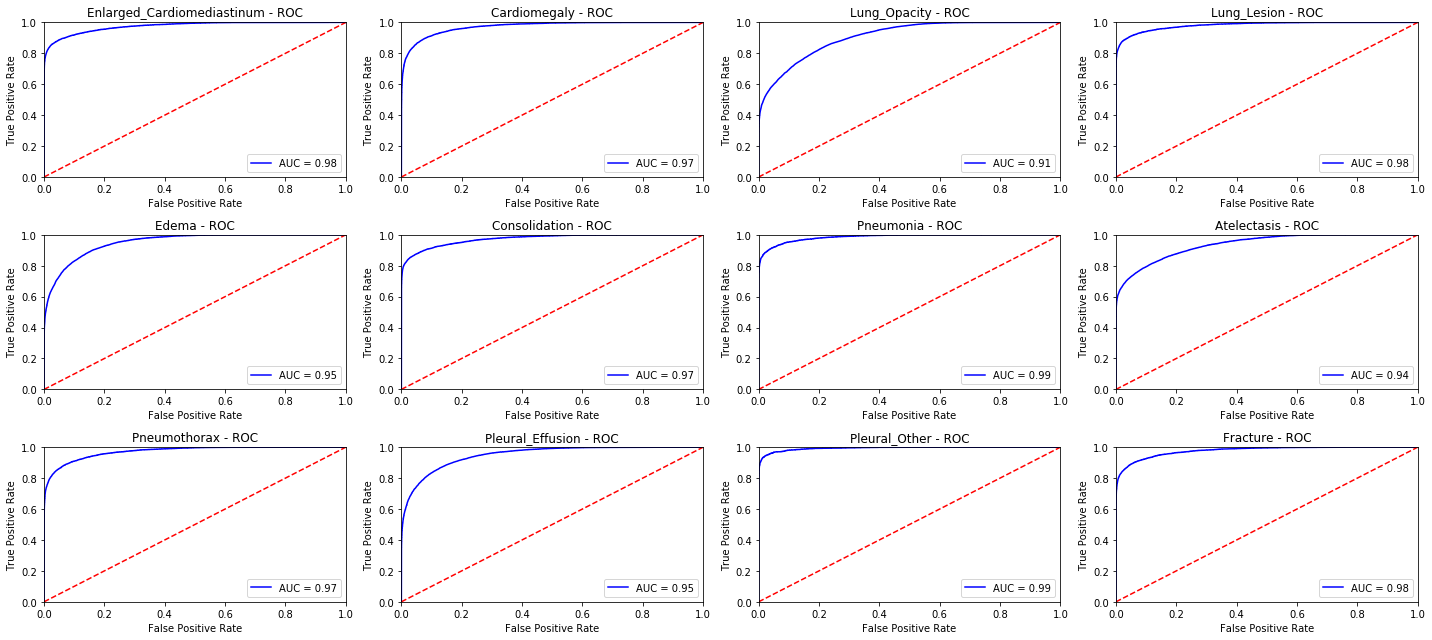

***** Precision / Recall *****


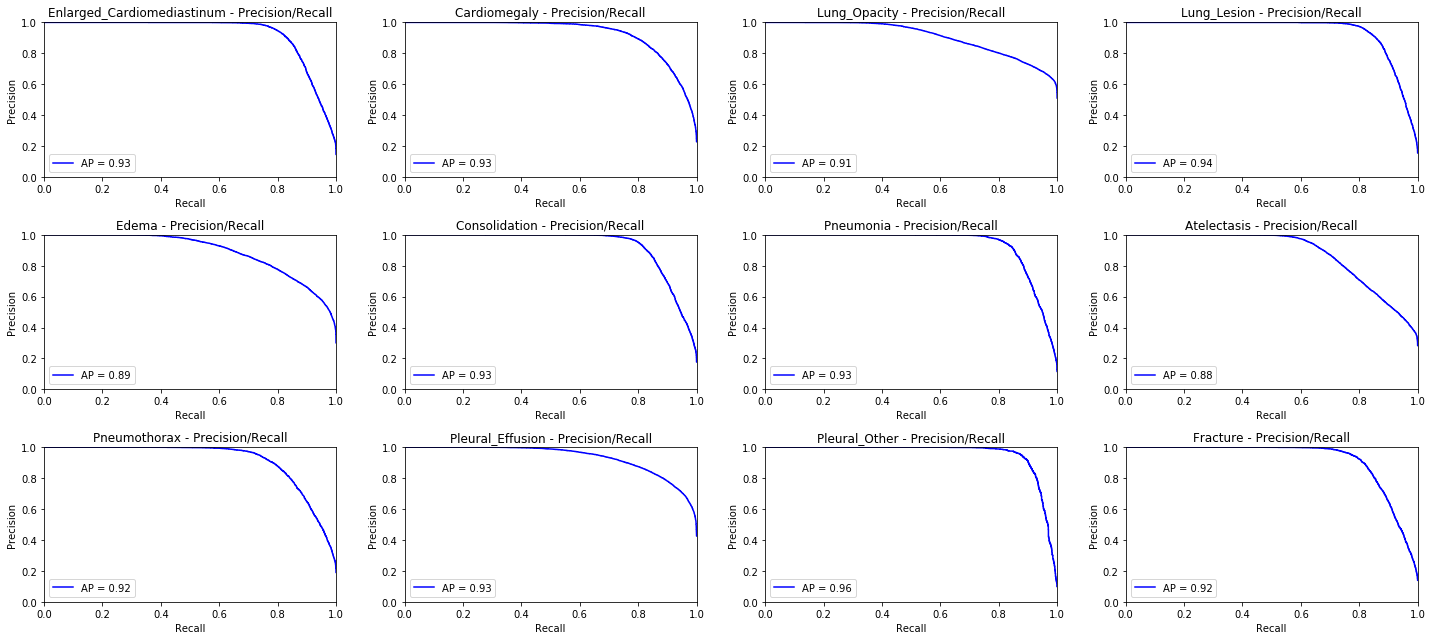


VALIDATION

▔▔▔▔▔▔▔


,Score for all Targets
Accuracy Score,0.075917
Hamming Loss,0.196812
Combined Recall,0.345230
Combined Precision,0.264333
Combined F1,0.278654


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
0,Enlarged_Cardiomediastinum,255,0.141176,0.062500,0.086643,0.545540,0.065866
1,Cardiomegaly,542,0.274908,0.380102,0.319058,0.777226,0.323624
2,Lung_Opacity,2281,0.469969,0.581345,0.519758,0.638612,0.563694
3,Lung_Lesion,228,0.070175,0.074074,0.072072,0.608368,0.072017
4,Edema,1232,0.570617,0.469606,0.515207,0.770222,0.488631
5,Consolidation,339,0.053097,0.090452,0.066914,0.620748,0.091085
6,Pneumonia,144,0.020833,0.033708,0.025751,0.609184,0.042656
7,Atelectasis,782,0.074169,0.263636,0.115768,0.589676,0.199364
8,Pneumothorax,393,0.513995,0.144183,0.225195,0.687112,0.177751
9,Pleural_Effusion,1728,0.803241,0.522001,0.632779,0.781886,0.630500


***** ROC *****


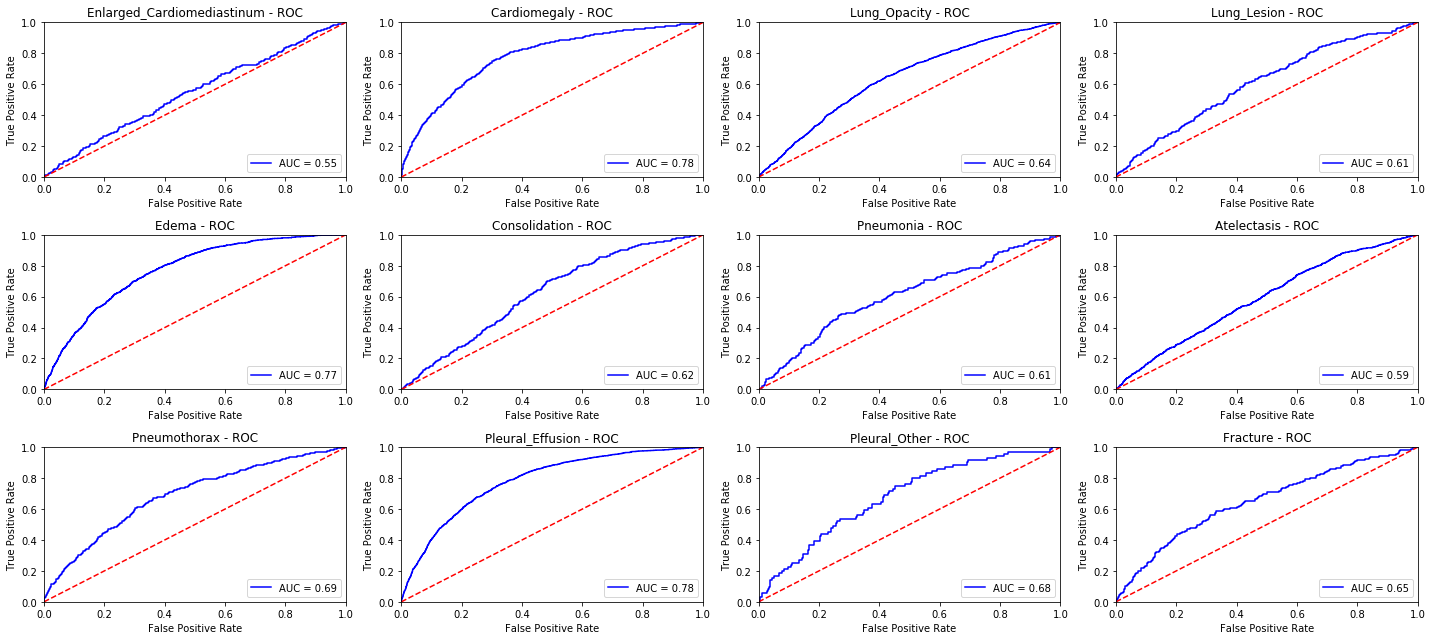

***** Precision / Recall *****


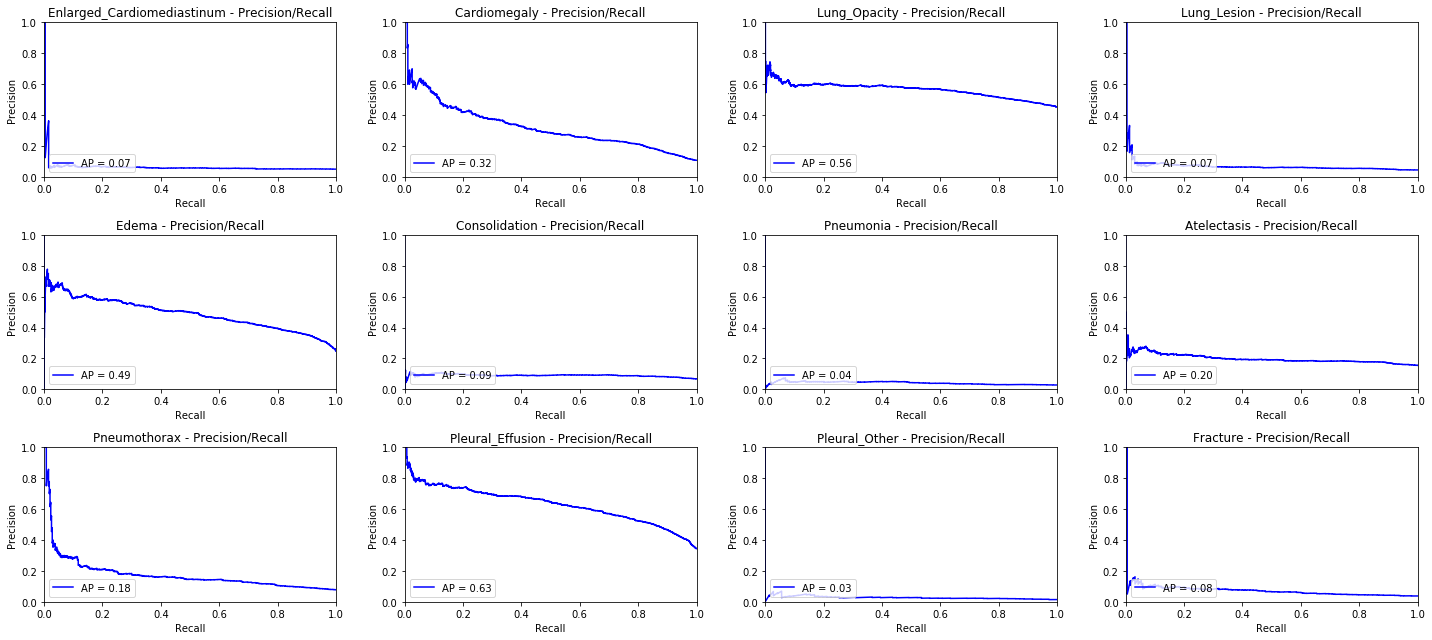

In [7]:
standardTraining.displayMetrics()